<a href="https://colab.research.google.com/github/victorluizz/topicosAvancadosGDI/blob/main/GDI_Avan%C3%A7ado_Projeto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto

Coletamos os dados sobre todas as partidas de basquete e sobre os jogadores durante as temporadas de 2019 e 2020. Os dados foram coletados através da API da NBA. Inicialmente, encontramos o dataset no Kaggle, entretanto, ele estava "perfeito" demais, e decidimos coletar por conta própria, para tratar os dados e remover o que achassemos irrelevante. Nos interessamos pelos dados pois basquete é um esporte que temos interesse em aprender mais, e achamos o projeto uma oportunidade perfeita para aprender mais entendendo as colunas e fazendo análises em cima delas.

In [1]:
pip install nba_api


In [2]:
from nba_api.stats.static import players
from nba_api.stats.endpoints import playergamelog
import pandas as pd
import time
from IPython.display import display


## Coleta dos dados

Nessa parte, começamos a coletar os dados, filtrando as temporadas 2019 e 2020 e a temporada de jogos regulares. Não conseguimos realizar a extração sem um loop, infelizmente.

In [3]:
from nba_api.stats.endpoints import leaguegamefinder, boxscoretraditionalv2

# Definindo a temporada de jogos que citamos acima, 2019-2020
season = '2019-20'

game_finder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
games_data = game_finder.get_data_frames()[0]


# Selecionando apenas os jogos  de 2019-20 que fazem parte da temporada regular da NBA. O ID dos jogos da temporada regular começam com "002"
games_data = games_data[(games_data['SEASON_ID'] == '22019') & (games_data['GAME_ID'].str.startswith('002'))]

# Mostrar o tamanho do DataFrame após filtragem e as primeiras linhas para inspeção
print("Tamanho de games_data após filtragem:", games_data.shape)
print(games_data.head())

# Lista para armazenas as informações dos jogadores por jogo
jogadores_por_jogo = []

# Infelizmente, não conseguimos fazer de outra forma se não com loop.
for index, game in games_data.iterrows():
    game_id = game['GAME_ID']

    try:

        boxscore = boxscoretraditionalv2.BoxScoreTraditionalV2(game_id=game_id, timeout=60)
        boxscore_df = boxscore.get_data_frames()[0]

        jogadores_por_jogo.append(boxscore_df)

        print(f"Dados coletados para o jogo ID {game_id}")

        time.sleep(1)
    except Exception as e:
        print(f"Erro ao coletar dados para o jogo ID {game_id}: {e}")

# Concatenando os detalhes dos jogadores em um único DF
todos_jogadores_df = pd.concat(jogadores_por_jogo, ignore_index=True)


todos_jogadores_df.to_csv(f'nba_season_{season}_player_stats.csv', index=False)

print(f'Dados da temporada {season} salvos com sucesso em nba_season_{season}_player_stats.csv')


Tamanho de games_data após filtragem: (2118, 28)
    SEASON_ID     TEAM_ID TEAM_ABBREVIATION           TEAM_NAME     GAME_ID  \
168     22019  1610612746               LAC         LA Clippers  0021901317   
169     22019  1610612743               DEN      Denver Nuggets  0021901318   
170     22019  1610612761               TOR     Toronto Raptors  0021901318   
171     22019  1610612745               HOU     Houston Rockets  0021901315   
172     22019  1610612755               PHI  Philadelphia 76ers  0021901315   

      GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  DREB  REB  AST  \
168  2020-08-14  LAC vs. OKC  W  265  107  ...   0.692    12    49   61   23   
169  2020-08-14    DEN @ TOR  L  240  109  ...   0.913     9    32   41   27   
170  2020-08-14  TOR vs. DEN  W  241  117  ...   0.643    13    38   51   27   
171  2020-08-14  HOU vs. PHI  L  240   96  ...   0.875     1    26   27   25   
172  2020-08-14    PHI @ HOU  W  241  134  ...   0.818     8    43   51   31

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
csv_file_path = '/content/drive/MyDrive/Projeto 1 - GDI Avançado/nba_season_2019-20_player_stats.csv'


df = pd.read_csv(csv_file_path)


pd.set_option('display.max_columns', None)


## Dataset inicial

Nosso dataset inicialmente ficou com 29 colunas, que posteriormente, teve seu tamanho aumentado devido a fase de tratamento.

### Significado das colunas

* **GAME_ID:** ID de cada jogo.
* **TEAM_ID:** ID de cada time.
* **TEAM_ABBREVIATION:** Abreviação do nome do time
* **TEAM_CITY:** Cidade do time.
* **PLAYER_ID:** ID para cada jogador.
* **PLAYER_NAME:** Nome completo do jogador.
* **NICKNAME:** Apelido ou nome usado na camisa do jogador.
* **START_POSITION:** Posição inicial do jogador. Quando a coluna está vazia, significa que o jogador não inicia como um titular, e sim como regular.
* **COMMENT:** Comentários sobre o desemepenho do jogador ou sobre a partida.
* **MIN:** Minutos jogados pelo jogador na partida.
* **FGM (Field Goals Made):** Total de arremessos de campo convertidos pelo jogador.
* **FGA (Field Goals Attempted):** Total de arremessos de campo que o jogador tentou.
* **FG_PCT (Field Goal Percentage):** Porcentagem de acerto dos arremessos de campo (FGM / FGA).
* **FG3M (Three-Point Field Goals Made):** Total de arremessos de três pontos convertidos pelo jogador.
* **FG3A (Three-Point Field Goals Attempted):** Total de arremessos de três pontos tentados pelo jogador.
* **FG3_PCT (Three-Point Field Goal Percentage):** Porcentagem de acerto dos arremessos de três pontos (FG3M / FG3A).
* **FTM (Free Throws Made):** Total de lances livres convertidos pelo jogador.
* **FTA (Free Throws Attempted):** Total de lances livres tentados pelo jogador.
* **FT_PCT (Free Throw Percentage):** Porcentagem de acerto dos lances livres (FTM / FTA).
* **OREB (Offensive Rebounds):** Total de rebotes ofensivos pegados pelo jogador.
* **DREB (Defensive Rebounds):** Total de rebotes defensivos pegados pelo jogador.
* **REB (Rebounds):** Total de rebotes (ofensivos + defensivos) pegados pelo jogador.
* **AST (Assists):** Total de assistências feitas pelo jogador.
* **STL (Steals):** Total de roubos de bola feitos pelo jogador.
* **BLK (Blocks):** Total de bloqueios de arremessos feitos pelo jogador.
* **TO (Turnovers):8* Total de vezes que o jogador perdeu a posse da bola para o time adversário.
* **PF (Personal Fouls):** Total de faltas pessoais cometidas pelo jogador.
* **PTS (Points):** Total de pontos marcados pelo jogador.
* **PLUS_MINUS:** Estatística que representa a diferença de pontos quando o jogador está em quadra. Um valor positivo indica que o time marcou mais pontos do que sofreu enquanto o jogador estava em quadra, e um valor negativo indica o contrário.

In [7]:
df.head(15)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,21901316,1610612748,MIA,Miami,1629130,Duncan Robinson,Duncan,F,NaN,13.000000:24,0.0,3.0,0.000,0.0,3.0,0.000,0.0,0.0,0.000,0.0,2.0,2.0,1.0,0.0,0.0,2.0,1.0,0.0,-5.0
1,21901316,1610612748,MIA,Miami,2617,Udonis Haslem,Udonis,F,NaN,23.000000:31,3.0,5.0,0.600,1.0,1.0,1.000,0.0,0.0,0.000,1.0,7.0,8.0,0.0,0.0,0.0,1.0,3.0,7.0,-5.0
2,21901316,1610612748,MIA,Miami,203482,Kelly Olynyk,Kelly,C,NaN,20.000000:19,2.0,9.0,0.222,2.0,8.0,0.250,0.0,0.0,0.000,0.0,6.0,6.0,0.0,0.0,1.0,0.0,0.0,6.0,-9.0
3,21901316,1610612748,MIA,Miami,1629639,Tyler Herro,Tyler,G,NaN,27.000000:56,6.0,16.0,0.375,3.0,8.0,0.375,1.0,1.0,1.000,1.0,0.0,1.0,3.0,0.0,0.0,3.0,2.0,16.0,-10.0
4,21901316,1610612748,MIA,Miami,1629134,Kendrick Nunn,Kendrick,G,NaN,32.000000:58,8.0,27.0,0.296,1.0,9.0,0.111,6.0,6.0,1.000,1.0,1.0,2.0,4.0,3.0,1.0,5.0,1.0,23.0,-21.0
5,21901316,1610612748,MIA,Miami,203524,Solomon Hill,Solomon,NaN,NaN,40.000000:34,5.0,13.0,0.385,1.0,4.0,0.250,10.0,12.0,0.833,2.0,5.0,7.0,3.0,1.0,0.0,3.0,2.0,21.0,-8.0
6,21901316,1610612748,MIA,Miami,1627884,Derrick Jones Jr.,Derrick,NaN,NaN,16.000000:03,1.0,2.0,0.500,0.0,0.0,0.000,1.0,2.0,0.500,2.0,0.0,2.0,2.0,2.0,0.0,0.0,2.0,3.0,-2.0
7,21901316,1610612748,MIA,Miami,203086,Meyers Leonard,Meyers,NaN,NaN,28.000000:46,3.0,7.0,0.429,2.0,5.0,0.400,1.0,2.0,0.500,2.0,5.0,7.0,0.0,0.0,0.0,3.0,0.0,9.0,-10.0
8,21901316,1610612748,MIA,Miami,1629735,Chris Silva,Chris,NaN,NaN,24.000000:29,2.0,4.0,0.500,0.0,0.0,0.000,1.0,4.0,0.250,4.0,7.0,11.0,1.0,0.0,3.0,1.0,3.0,5.0,-12.0
9,21901316,1610612748,MIA,Miami,1629734,Kyle Alexander,Kyle,NaN,NaN,12.000000:00,1.0,1.0,1.000,0.0,0.0,0.000,0.0,0.0,0.000,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0,-3.0


Tamanho do dataset

In [8]:
df.shape

(53076, 29)

Informações do dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53076 entries, 0 to 53075
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GAME_ID            53076 non-null  int64  
 1   TEAM_ID            53076 non-null  int64  
 2   TEAM_ABBREVIATION  53076 non-null  object 
 3   TEAM_CITY          53076 non-null  object 
 4   PLAYER_ID          53076 non-null  int64  
 5   PLAYER_NAME        53076 non-null  object 
 6   NICKNAME           53076 non-null  object 
 7   START_POSITION     21180 non-null  object 
 8   COMMENT            8290 non-null   object 
 9   MIN                44786 non-null  object 
 10  FGM                44786 non-null  float64
 11  FGA                44786 non-null  float64
 12  FG_PCT             44786 non-null  float64
 13  FG3M               44786 non-null  float64
 14  FG3A               44786 non-null  float64
 15  FG3_PCT            44786 non-null  float64
 16  FTM                447

In [10]:
# Verificando estatísticas descritivas
print(df.describe(include='all'))

             GAME_ID       TEAM_ID TEAM_ABBREVIATION TEAM_CITY     PLAYER_ID  \
count   5.307600e+04  5.307600e+04             53076     53076  5.307600e+04   
unique           NaN           NaN                30        30           NaN   
top              NaN           NaN               DAL    Dallas           NaN   
freq             NaN           NaN              1902      1902           NaN   
mean    2.190055e+07  1.610613e+09               NaN       NaN  1.001951e+06   
std     3.474578e+02  8.582452e+00               NaN       NaN  7.136744e+05   
min     2.190000e+07  1.610613e+09               NaN       NaN  1.713000e+03   
25%     2.190026e+07  1.610613e+09               NaN       NaN  2.030950e+05   
50%     2.190053e+07  1.610613e+09               NaN       NaN  1.626209e+06   
75%     2.190080e+07  1.610613e+09               NaN       NaN  1.628977e+06   
max     2.190132e+07  1.610613e+09               NaN       NaN  1.629760e+06   

           PLAYER_NAME NICKNAME START_P

In [11]:
# Verificando valores nulos
print(df.isnull().sum())

GAME_ID                  0
TEAM_ID                  0
TEAM_ABBREVIATION        0
TEAM_CITY                0
PLAYER_ID                0
PLAYER_NAME              0
NICKNAME                 0
START_POSITION       31896
COMMENT              44786
MIN                   8290
FGM                   8290
FGA                   8290
FG_PCT                8290
FG3M                  8290
FG3A                  8290
FG3_PCT               8290
FTM                   8290
FTA                   8290
FT_PCT                8290
OREB                  8290
DREB                  8290
REB                   8290
AST                   8290
STL                   8290
BLK                   8290
TO                    8290
PF                    8290
PTS                   8290
PLUS_MINUS            8290
dtype: int64


## Tratando a coluna de comentários "COMMENT"

Inicialmente, consideramos descartar a coluna, mas depois, verificamos melhor e decidimos verificar quais eram os comentários feitos.

In [12]:
# Listando todos os comentários únicos
comentarios_unicos = df['COMMENT'].unique()

print(comentarios_unicos)


[nan 'DNP - Injury/Illness' "DNP - Coach's Decision"
 'DND - Injury/Illness' 'NWT_LEAGUE_SUSPENSION' 'DND - Rest' 'DNP - Rest'
 'NWT - Not With Team' 'NWT - Injury/Illness' 'NWT - Personal'
 "DND - Coach's Decision" 'DNP_LEAGUE_SUSPENSION' 'DNP_PERSONAL'
 'DND - Personal']


## Os comentários

* **DNP:** Significa que o jogador não jogou.
* **DND:** Significa que o jogador foi tido como não disponível.
* Os outros valores são especificações dos motivos pelo qual o jogador não jogou, ou não estava disponível.



In [13]:
# Lista de categorias de comentários
categorias_comentarios = [
    'DNP - Injury/Illness', "DNP - Coach's Decision", 'DNP - Rest', 'DNP - League Suspension', 'DNP - Personal',
    'DND - Injury/Illness', "DND - Coach's Decision", 'DND - Rest', 'DND - Personal',
    'NWT - League Suspension', 'NWT - Not With Team', 'NWT - Injury/Illness', 'NWT - Personal'
]

# Criar colunas binárias para cada categoria
for categoria in categorias_comentarios:
    df[categoria] = 0

# Preenchendo as colunas binárias com 1 onde corresponderem ao comentário
for categoria in categorias_comentarios:
    df[categoria] = df['COMMENT'].apply(lambda x: 1 if x == categoria else 0)

# Removendo a coluna de comentários pois ela não é mais necessária
df = df.drop(columns=['COMMENT'])



In [14]:
df.head(15)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,DNP - Injury/Illness,DNP - Coach's Decision,DNP - Rest,DNP - League Suspension,DNP - Personal,DND - Injury/Illness,DND - Coach's Decision,DND - Rest,DND - Personal,NWT - League Suspension,NWT - Not With Team,NWT - Injury/Illness,NWT - Personal
0,21901316,1610612748,MIA,Miami,1629130,Duncan Robinson,Duncan,F,13.000000:24,0.0,3.0,0.000,0.0,3.0,0.000,0.0,0.0,0.000,0.0,2.0,2.0,1.0,0.0,0.0,2.0,1.0,0.0,-5.0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,21901316,1610612748,MIA,Miami,2617,Udonis Haslem,Udonis,F,23.000000:31,3.0,5.0,0.600,1.0,1.0,1.000,0.0,0.0,0.000,1.0,7.0,8.0,0.0,0.0,0.0,1.0,3.0,7.0,-5.0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,21901316,1610612748,MIA,Miami,203482,Kelly Olynyk,Kelly,C,20.000000:19,2.0,9.0,0.222,2.0,8.0,0.250,0.0,0.0,0.000,0.0,6.0,6.0,0.0,0.0,1.0,0.0,0.0,6.0,-9.0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,21901316,1610612748,MIA,Miami,1629639,Tyler Herro,Tyler,G,27.000000:56,6.0,16.0,0.375,3.0,8.0,0.375,1.0,1.0,1.000,1.0,0.0,1.0,3.0,0.0,0.0,3.0,2.0,16.0,-10.0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,21901316,1610612748,MIA,Miami,1629134,Kendrick Nunn,Kendrick,G,32.000000:58,8.0,27.0,0.296,1.0,9.0,0.111,6.0,6.0,1.000,1.0,1.0,2.0,4.0,3.0,1.0,5.0,1.0,23.0,-21.0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,21901316,1610612748,MIA,Miami,203524,Solomon Hill,Solomon,NaN,40.000000:34,5.0,13.0,0.385,1.0,4.0,0.250,10.0,12.0,0.833,2.0,5.0,7.0,3.0,1.0,0.0,3.0,2.0,21.0,-8.0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,21901316,1610612748,MIA,Miami,1627884,Derrick Jones Jr.,Derrick,NaN,16.000000:03,1.0,2.0,0.500,0.0,0.0,0.000,1.0,2.0,0.500,2.0,0.0,2.0,2.0,2.0,0.0,0.0,2.0,3.0,-2.0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,21901316,1610612748,MIA,Miami,203086,Meyers Leonard,Meyers,NaN,28.000000:46,3.0,7.0,0.429,2.0,5.0,0.400,1.0,2.0,0.500,2.0,5.0,7.0,0.0,0.0,0.0,3.0,0.0,9.0,-10.0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,21901316,1610612748,MIA,Miami,1629735,Chris Silva,Chris,NaN,24.000000:29,2.0,4.0,0.500,0.0,0.0,0.000,1.0,4.0,0.250,4.0,7.0,11.0,1.0,0.0,3.0,1.0,3.0,5.0,-12.0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,21901316,1610612748,MIA,Miami,1629734,Kyle Alexander,Kyle,NaN,12.000000:00,1.0,1.0,1.000,0.0,0.0,0.000,0.0,0.0,0.000,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0,-3.0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Tratando a coluna de comentários

A seguir, a explicação das novas colunas:

No geral, temos 3 tipos de motivos princiapais que explicam previamente a ausência de um jogador, sendo esses:


1.  **DNP -** Significa que o jogador não jogou.
2.  **DND -** Significa que o jogador foi tido como "não disponível".
3. **NWT -** Significa que o jogador não estava com o time.

Além dos 3 motivos principais, temos outros que acompanham eles e especificam melhor a causa:



1.  **Injury/Illness -** Indica que o jogador não participou do jogo devido a alguma lesão ou doença
2.  **Coachs Decision -** Indica que o jogador não participou do jogo devido a uma decisão do treinador.
3. **Rest -** Indica que o jogador não participou do jogo para descansar.
4. **League Suspension -** Indica que o jogador não participou devido a alguma suspensou imposta pela liga.
5. **Personal -** Indica que o ojogador não participou por algum motivo pessoal.


## Trabalhando na coluna de posição inicial

Agora, vamos adiciona o valor "bench" (reseva) para a coluna "start_position".
Vamos também adiconar o valor zero para os campos númericos que estão vazios.

In [15]:

df['START_POSITION'] = df['START_POSITION'].fillna('Bench')


numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(0)


In [16]:
df.head(15)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,DNP - Injury/Illness,DNP - Coach's Decision,DNP - Rest,DNP - League Suspension,DNP - Personal,DND - Injury/Illness,DND - Coach's Decision,DND - Rest,DND - Personal,NWT - League Suspension,NWT - Not With Team,NWT - Injury/Illness,NWT - Personal
0,21901316,1610612748,MIA,Miami,1629130,Duncan Robinson,Duncan,F,13.000000:24,0.0,3.0,0.000,0.0,3.0,0.000,0.0,0.0,0.000,0.0,2.0,2.0,1.0,0.0,0.0,2.0,1.0,0.0,-5.0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,21901316,1610612748,MIA,Miami,2617,Udonis Haslem,Udonis,F,23.000000:31,3.0,5.0,0.600,1.0,1.0,1.000,0.0,0.0,0.000,1.0,7.0,8.0,0.0,0.0,0.0,1.0,3.0,7.0,-5.0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,21901316,1610612748,MIA,Miami,203482,Kelly Olynyk,Kelly,C,20.000000:19,2.0,9.0,0.222,2.0,8.0,0.250,0.0,0.0,0.000,0.0,6.0,6.0,0.0,0.0,1.0,0.0,0.0,6.0,-9.0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,21901316,1610612748,MIA,Miami,1629639,Tyler Herro,Tyler,G,27.000000:56,6.0,16.0,0.375,3.0,8.0,0.375,1.0,1.0,1.000,1.0,0.0,1.0,3.0,0.0,0.0,3.0,2.0,16.0,-10.0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,21901316,1610612748,MIA,Miami,1629134,Kendrick Nunn,Kendrick,G,32.000000:58,8.0,27.0,0.296,1.0,9.0,0.111,6.0,6.0,1.000,1.0,1.0,2.0,4.0,3.0,1.0,5.0,1.0,23.0,-21.0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,21901316,1610612748,MIA,Miami,203524,Solomon Hill,Solomon,Bench,40.000000:34,5.0,13.0,0.385,1.0,4.0,0.250,10.0,12.0,0.833,2.0,5.0,7.0,3.0,1.0,0.0,3.0,2.0,21.0,-8.0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,21901316,1610612748,MIA,Miami,1627884,Derrick Jones Jr.,Derrick,Bench,16.000000:03,1.0,2.0,0.500,0.0,0.0,0.000,1.0,2.0,0.500,2.0,0.0,2.0,2.0,2.0,0.0,0.0,2.0,3.0,-2.0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,21901316,1610612748,MIA,Miami,203086,Meyers Leonard,Meyers,Bench,28.000000:46,3.0,7.0,0.429,2.0,5.0,0.400,1.0,2.0,0.500,2.0,5.0,7.0,0.0,0.0,0.0,3.0,0.0,9.0,-10.0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,21901316,1610612748,MIA,Miami,1629735,Chris Silva,Chris,Bench,24.000000:29,2.0,4.0,0.500,0.0,0.0,0.000,1.0,4.0,0.250,4.0,7.0,11.0,1.0,0.0,3.0,1.0,3.0,5.0,-12.0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,21901316,1610612748,MIA,Miami,1629734,Kyle Alexander,Kyle,Bench,12.000000:00,1.0,1.0,1.000,0.0,0.0,0.000,0.0,0.0,0.000,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0,-3.0,0,0,0,0,0,0,0,0,0,0,0,0,0


Vamos converter o valor da coluna MIN para o tipo numerico, em minutos e segundos

In [17]:
# Converter a coluna 'MIN' para um tipo numérico
df['MIN'] = df['MIN'].apply(lambda x: float(x.split(':')[0]) + float(x.split(':')[1])/60 if pd.notnull(x) else 0)


In [18]:
df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,DNP - Injury/Illness,DNP - Coach's Decision,DNP - Rest,DNP - League Suspension,DNP - Personal,DND - Injury/Illness,DND - Coach's Decision,DND - Rest,DND - Personal,NWT - League Suspension,NWT - Not With Team,NWT - Injury/Illness,NWT - Personal
0,21901316,1610612748,MIA,Miami,1629130,Duncan Robinson,Duncan,F,13.400000,0.0,3.0,0.000,0.0,3.0,0.000,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,2.0,1.0,0.0,-5.0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,21901316,1610612748,MIA,Miami,2617,Udonis Haslem,Udonis,F,23.516667,3.0,5.0,0.600,1.0,1.0,1.000,0.0,0.0,0.0,1.0,7.0,8.0,0.0,0.0,0.0,1.0,3.0,7.0,-5.0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,21901316,1610612748,MIA,Miami,203482,Kelly Olynyk,Kelly,C,20.316667,2.0,9.0,0.222,2.0,8.0,0.250,0.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0,1.0,0.0,0.0,6.0,-9.0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,21901316,1610612748,MIA,Miami,1629639,Tyler Herro,Tyler,G,27.933333,6.0,16.0,0.375,3.0,8.0,0.375,1.0,1.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,3.0,2.0,16.0,-10.0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,21901316,1610612748,MIA,Miami,1629134,Kendrick Nunn,Kendrick,G,32.966667,8.0,27.0,0.296,1.0,9.0,0.111,6.0,6.0,1.0,1.0,1.0,2.0,4.0,3.0,1.0,5.0,1.0,23.0,-21.0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Valores duplicados

Uma coisa que notamos enquanto coletavamos os dados, é que várias linhas vieram duplicadas. Para confirmar, utilizamos alguns comandos para identificar e remover. Não sabemos o motivo dos dados duplicados.

In [19]:
# Verificando duplicatas
duplicated_rows = df.duplicated()
print(f"Número de linhas duplicadas: {duplicated_rows.sum()}")



Número de linhas duplicadas: 26538


In [20]:
# Remover duplicatas
df = df.drop_duplicates()

In [21]:
# Verificar o número de linhas após a remoção das duplicatas
print("Número de linhas após a remoção das duplicatas:", len(df))

Número de linhas após a remoção das duplicatas: 26538


In [22]:
# Verificando valores únicos em colunas categóricas
print(df['TEAM_ABBREVIATION'].unique())
print(df['START_POSITION'].unique())


['MIA' 'IND' 'OKC' 'LAC' 'PHI' 'HOU' 'DEN' 'TOR' 'DAL' 'PHX' 'SAS' 'UTA'
 'NOP' 'ORL' 'MIL' 'MEM' 'WAS' 'BOS' 'SAC' 'LAL' 'POR' 'BKN' 'NYK' 'ATL'
 'DET' 'CHA' 'MIN' 'CLE' 'CHI' 'GSW']
['F' 'C' 'G' 'Bench']


In [23]:
# Convertendo as colunas categóricas para tipo 'category'
df['TEAM_ABBREVIATION'] = df['TEAM_ABBREVIATION'].astype('category')
df['START_POSITION'] = df['START_POSITION'].astype('category')

In [24]:
df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,DNP - Injury/Illness,DNP - Coach's Decision,DNP - Rest,DNP - League Suspension,DNP - Personal,DND - Injury/Illness,DND - Coach's Decision,DND - Rest,DND - Personal,NWT - League Suspension,NWT - Not With Team,NWT - Injury/Illness,NWT - Personal
0,21901316,1610612748,MIA,Miami,1629130,Duncan Robinson,Duncan,F,13.400000,0.0,3.0,0.000,0.0,3.0,0.000,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,2.0,1.0,0.0,-5.0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,21901316,1610612748,MIA,Miami,2617,Udonis Haslem,Udonis,F,23.516667,3.0,5.0,0.600,1.0,1.0,1.000,0.0,0.0,0.0,1.0,7.0,8.0,0.0,0.0,0.0,1.0,3.0,7.0,-5.0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,21901316,1610612748,MIA,Miami,203482,Kelly Olynyk,Kelly,C,20.316667,2.0,9.0,0.222,2.0,8.0,0.250,0.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0,1.0,0.0,0.0,6.0,-9.0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,21901316,1610612748,MIA,Miami,1629639,Tyler Herro,Tyler,G,27.933333,6.0,16.0,0.375,3.0,8.0,0.375,1.0,1.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,3.0,2.0,16.0,-10.0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,21901316,1610612748,MIA,Miami,1629134,Kendrick Nunn,Kendrick,G,32.966667,8.0,27.0,0.296,1.0,9.0,0.111,6.0,6.0,1.0,1.0,1.0,2.0,4.0,3.0,1.0,5.0,1.0,23.0,-21.0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26538 entries, 0 to 53023
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   GAME_ID                  26538 non-null  int64   
 1   TEAM_ID                  26538 non-null  int64   
 2   TEAM_ABBREVIATION        26538 non-null  category
 3   TEAM_CITY                26538 non-null  object  
 4   PLAYER_ID                26538 non-null  int64   
 5   PLAYER_NAME              26538 non-null  object  
 6   NICKNAME                 26538 non-null  object  
 7   START_POSITION           26538 non-null  category
 8   MIN                      26538 non-null  float64 
 9   FGM                      26538 non-null  float64 
 10  FGA                      26538 non-null  float64 
 11  FG_PCT                   26538 non-null  float64 
 12  FG3M                     26538 non-null  float64 
 13  FG3A                     26538 non-null  float64 
 14  FG3_PCT    

In [26]:
# Salvando os dados limpos em um arquivo CSV
df.to_csv('/content/drive/My Drive/Projeto 1 - GDI Avançado/nba_season_2019-20_player_stats_cleaned.csv', index=False)

print("Dados limpos salvos com sucesso!")


Dados limpos salvos com sucesso!


In [27]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Vamos carregar o novo dataset, para evitar rodar todas as celulas sempre

In [28]:
csv_file_path = '/content/drive/MyDrive/Projeto 1 - GDI Avançado/nba_season_2019-20_player_stats_cleaned.csv'


df = pd.read_csv(csv_file_path)


pd.set_option('display.max_columns', None)

In [29]:
df.head(10)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,DNP - Injury/Illness,DNP - Coach's Decision,DNP - Rest,DNP - League Suspension,DNP - Personal,DND - Injury/Illness,DND - Coach's Decision,DND - Rest,DND - Personal,NWT - League Suspension,NWT - Not With Team,NWT - Injury/Illness,NWT - Personal
0,21901316,1610612748,MIA,Miami,1629130,Duncan Robinson,Duncan,F,13.400000,0.0,3.0,0.000,0.0,3.0,0.000,0.0,0.0,0.000,0.0,2.0,2.0,1.0,0.0,0.0,2.0,1.0,0.0,-5.0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,21901316,1610612748,MIA,Miami,2617,Udonis Haslem,Udonis,F,23.516667,3.0,5.0,0.600,1.0,1.0,1.000,0.0,0.0,0.000,1.0,7.0,8.0,0.0,0.0,0.0,1.0,3.0,7.0,-5.0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,21901316,1610612748,MIA,Miami,203482,Kelly Olynyk,Kelly,C,20.316667,2.0,9.0,0.222,2.0,8.0,0.250,0.0,0.0,0.000,0.0,6.0,6.0,0.0,0.0,1.0,0.0,0.0,6.0,-9.0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,21901316,1610612748,MIA,Miami,1629639,Tyler Herro,Tyler,G,27.933333,6.0,16.0,0.375,3.0,8.0,0.375,1.0,1.0,1.000,1.0,0.0,1.0,3.0,0.0,0.0,3.0,2.0,16.0,-10.0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,21901316,1610612748,MIA,Miami,1629134,Kendrick Nunn,Kendrick,G,32.966667,8.0,27.0,0.296,1.0,9.0,0.111,6.0,6.0,1.000,1.0,1.0,2.0,4.0,3.0,1.0,5.0,1.0,23.0,-21.0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,21901316,1610612748,MIA,Miami,203524,Solomon Hill,Solomon,Bench,40.566667,5.0,13.0,0.385,1.0,4.0,0.250,10.0,12.0,0.833,2.0,5.0,7.0,3.0,1.0,0.0,3.0,2.0,21.0,-8.0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,21901316,1610612748,MIA,Miami,1627884,Derrick Jones Jr.,Derrick,Bench,16.050000,1.0,2.0,0.500,0.0,0.0,0.000,1.0,2.0,0.500,2.0,0.0,2.0,2.0,2.0,0.0,0.0,2.0,3.0,-2.0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,21901316,1610612748,MIA,Miami,203086,Meyers Leonard,Meyers,Bench,28.766667,3.0,7.0,0.429,2.0,5.0,0.400,1.0,2.0,0.500,2.0,5.0,7.0,0.0,0.0,0.0,3.0,0.0,9.0,-10.0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,21901316,1610612748,MIA,Miami,1629735,Chris Silva,Chris,Bench,24.483333,2.0,4.0,0.500,0.0,0.0,0.000,1.0,4.0,0.250,4.0,7.0,11.0,1.0,0.0,3.0,1.0,3.0,5.0,-12.0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,21901316,1610612748,MIA,Miami,1629734,Kyle Alexander,Kyle,Bench,12.000000,1.0,1.0,1.000,0.0,0.0,0.000,0.0,0.0,0.000,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0,-3.0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
# Estatísticas descritivas gerais
print(df.describe())

# Estatísticas descritivas para colunas específicas, por exemplo, pontos (PTS), assistências (AST), etc.
print(df[['PTS', 'REB', 'AST', 'STL', 'BLK', 'TO', 'MIN']].describe())


            GAME_ID       TEAM_ID     PLAYER_ID           MIN           FGM  \
count  2.653800e+04  2.653800e+04  2.653800e+04  26538.000000  26538.000000   
mean   2.190055e+07  1.610613e+09  1.001951e+06     19.295925      3.261361   
std    3.474611e+02  8.582533e+00  7.136811e+05     12.533863      3.217465   
min    2.190000e+07  1.610613e+09  1.713000e+03      0.000000      0.000000   
25%    2.190026e+07  1.610613e+09  2.030950e+05      8.520833      0.000000   
50%    2.190053e+07  1.610613e+09  1.626209e+06     20.950000      3.000000   
75%    2.190080e+07  1.610613e+09  1.628977e+06     29.716667      5.000000   
max    2.190132e+07  1.610613e+09  1.629760e+06     51.550000     20.000000   

                FGA        FG_PCT          FG3M          FG3A       FG3_PCT  \
count  26538.000000  26538.000000  26538.000000  26538.000000  26538.000000   
mean       7.088552      0.362651      0.974527      2.722586      0.217226   
std        6.171287      0.274119      1.407921    

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações gerais do seaborn
sns.set(style="whitegrid")


O grafico a seguir mostra a distribuição de pontos

In [32]:
# Contar o número de jogadores que marcaram zero pontos
zero_pontos = df[df['PTS'] == 0].shape[0]
print(f"Número de jogadores que marcaram zero pontos: {zero_pontos}")


Número de jogadores que marcaram zero pontos: 6393


O gráfico a seguir aprsenta a distribuição sobreposta de pontos de acordo com as poisições iniciais dos jogadores. A partir dos resultados vemos que os jogadores que iniciam como reseva tem mais tendencia a não marcarem nenhum ponto em relação as demais posições iniciais dos jogadores.

<ipython-input-33-cf4eb507e9e5>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(forwards['PTS'], label='Forwards', shade=True, color='blue')
<ipython-input-33-cf4eb507e9e5>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(centers['PTS'], label='Centers', shade=True, color='green')
<ipython-input-33-cf4eb507e9e5>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(guards['PTS'], label='Guards', shade=True, color='red')
<ipython-input-33-cf4eb507e9e5>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(

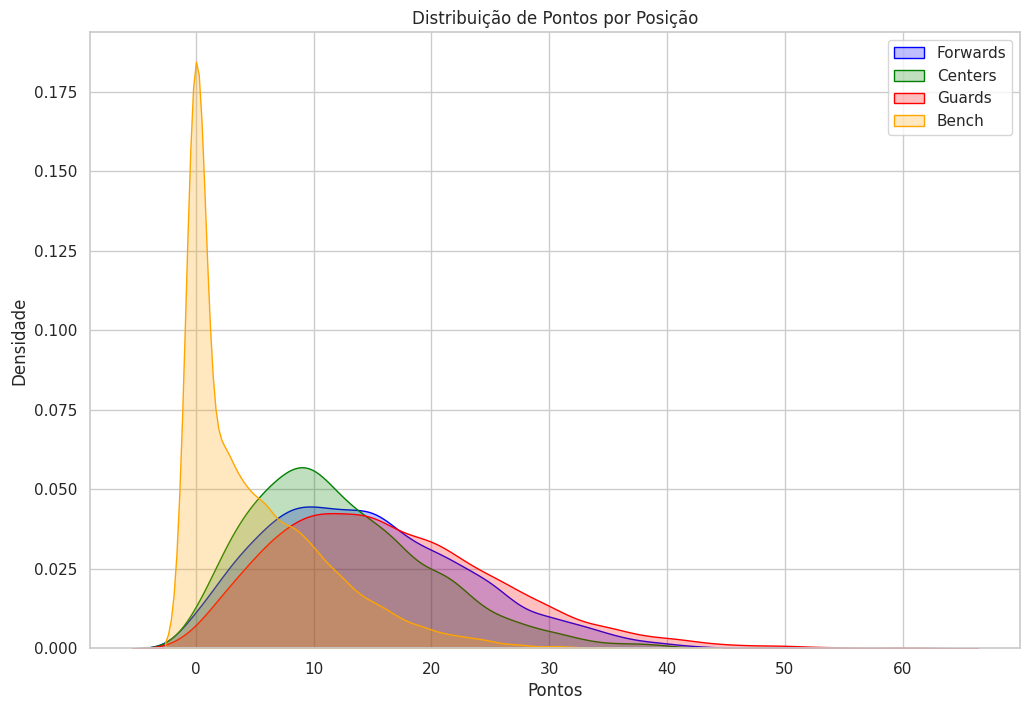

In [33]:
# Filtrando os dados para cada posição
forwards = df[df['START_POSITION'] == 'F']
centers = df[df['START_POSITION'] == 'C']
guards = df[df['START_POSITION'] == 'G']
bench = df[df['START_POSITION']== 'Bench']

# Criando gráficos de densidade sobrepostos
plt.figure(figsize=(12, 8))
sns.kdeplot(forwards['PTS'], label='Forwards', shade=True, color='blue')
sns.kdeplot(centers['PTS'], label='Centers', shade=True, color='green')
sns.kdeplot(guards['PTS'], label='Guards', shade=True, color='red')
sns.kdeplot(bench['PTS'], label='Bench', shade=True, color='orange')

plt.title('Distribuição de Pontos por Posição')
plt.xlabel('Pontos')
plt.ylabel('Densidade')
plt.legend()
plt.show()

## Analisando a relação entre os minutos e os pontos

Uma das análises quepensamos em fazer, era se havia alguma relação entre o tempo que se passa em jogo, e os pontos marcados. Para isso, plotamos o gráfico abaixo que mostra a distribuição de pontos vs minutos dos jogadores em cada partida.

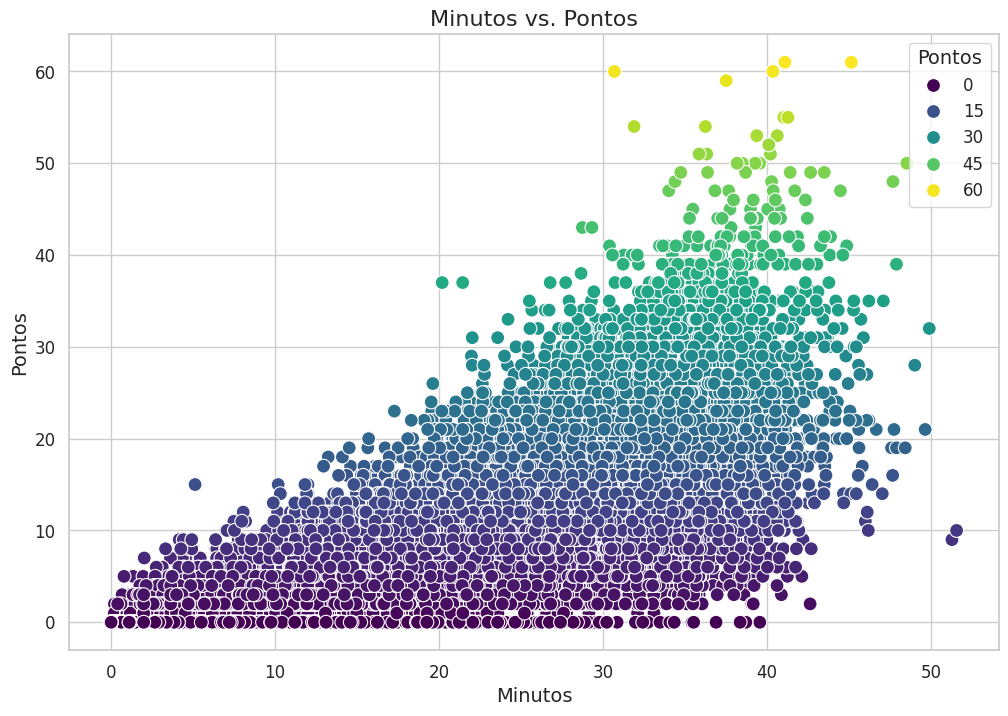

In [36]:
# Gráfico de dispersão entre minutos e pontos
palette = sns.color_palette("viridis", as_cmap=True)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='MIN', y='PTS', data=df, hue='PTS', palette=palette, edgecolor='w', s=100)
plt.title('Minutos vs. Pontos', fontsize=16)
plt.xlabel('Minutos', fontsize=14)
plt.ylabel('Pontos', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(title='Pontos', fontsize=12, title_fontsize=14)
plt.show()


Com a análise do gráfico, é posssível ver que os jogadores que passam mais tempo na quadra, marcam mais pontos em comparação com os que passam menos tempo.

Para verificar de outras formas, vamos tirar a covariância e a correlação entre as duas variáveis.

In [37]:
# Calcular a covariância entre os minutos jogados (MIN) e os pontos marcados (PTS)
covariance = df['MIN'].cov(df['PTS'])
print("Covariância entre MIN e PTS:", covariance)


Covariância entre MIN e PTS: 85.2078945364789


In [38]:
correlacao_min_pts = df['MIN'].corr(df['PTS'])
print("Correlação entre minutos e pontos:", correlacao_min_pts)



Correlação entre minutos e pontos: 0.7750885620112995


Além do gráfico anterior que plotamos, olhamos também a correlação e a covariância entre os minutos e os pontos. E tivemos que as duas tiveram resultados positivos, em que o numero de pontos aumenta ao longo do tempo de jogo.

## Analisando as relações entre as colunas

Seguindo o raciocinio de analisar a relação entre as colunas, plotamos um gráfico para entender melhor a relação entre algumas colunas importantes como a de pontos, assistência, minutos, roubos de bola, etc.
Apesar de algumas correlações serem bem baixas, nenhuma chegou a ser negativa.

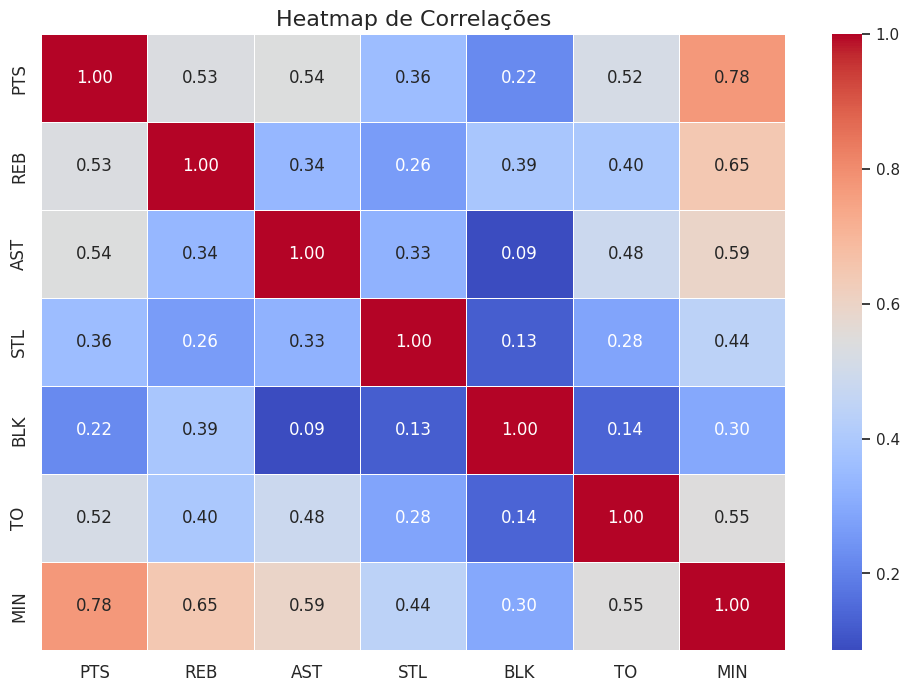

In [39]:
# Ajustando o estilo e a paleta de cores
sns.set_style("whitegrid")
sns.set_palette("coolwarm")

# Heatmap de correlações
plt.figure(figsize=(12, 8))
corr = df[['PTS', 'REB', 'AST', 'STL', 'BLK', 'TO', 'MIN']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", annot_kws={"size": 12})
plt.title('Heatmap de Correlações', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Posições iniciais

Esse gráfico mostra a quantidade dos jogadores ue iniciam em determinadas posições. A maioria inicia como reserva, o que faz sentido, já que em nossas pesquisas, descobrimos que em uma partida de basquete, inicalmente há 5 jogadores em cada time como titulares e 7 como reservas.

<ipython-input-40-9d8fe262fe1c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='START_POSITION', data=df, palette='viridis')


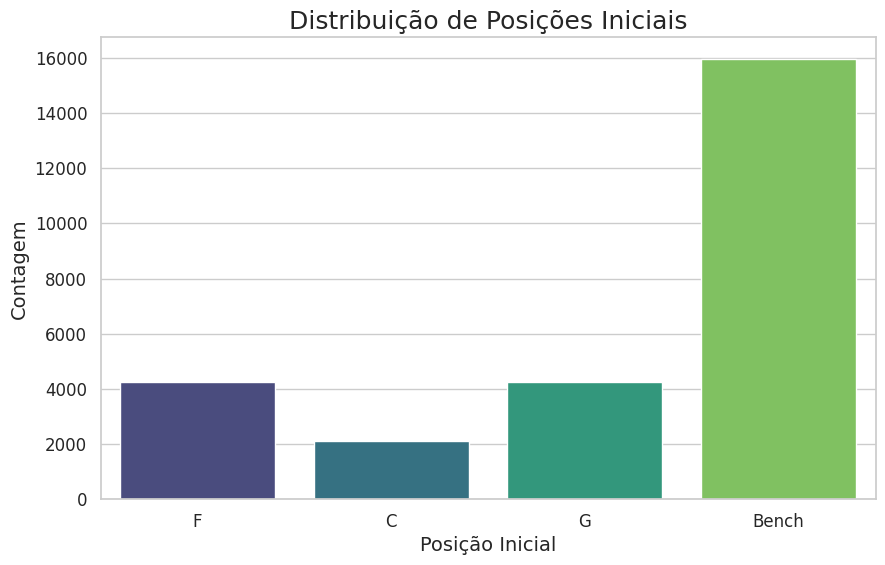

In [40]:
# Visualização de contagens por posição inicial
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='START_POSITION', data=df, palette='viridis')
ax.set_title('Distribuição de Posições Iniciais', fontsize=16)
ax.set_xlabel('Posição Inicial', fontsize=14)
ax.set_ylabel('Contagem', fontsize=14)
ax.set_ylabel('Contagem', fontsize=14)
ax.tick_params(labelsize=12)
ax.title.set_size(18)
plt.show()

## Verificando os minutos por posição inicial

O gráfico abaixo teve como objetivo oobservar a relação entre os minutos jogados e a posição inicial de cada jogador.

<ipython-input-41-538747cf2cec>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='START_POSITION', y='MIN', data=df, palette='Set2', linewidth=2)


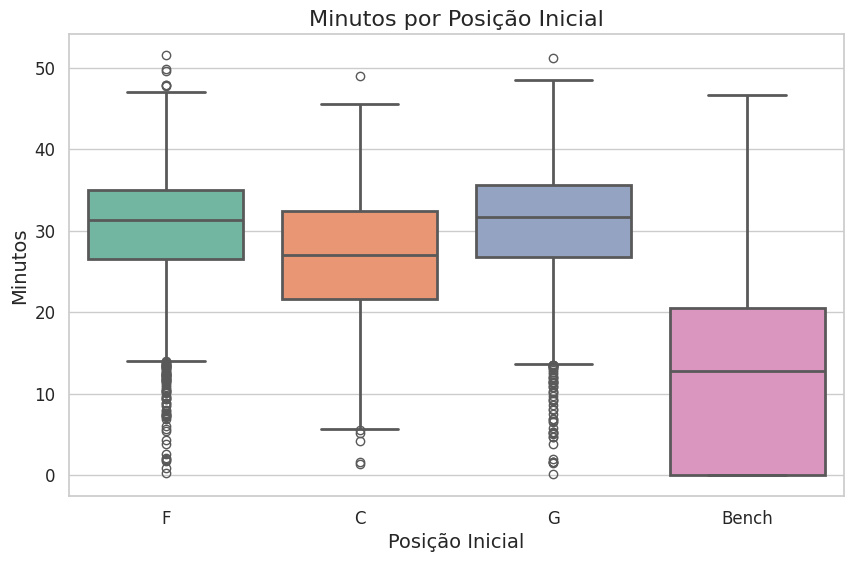

In [41]:
# Definindo o estilo
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='START_POSITION', y='MIN', data=df, palette='Set2', linewidth=2)
plt.title('Minutos por Posição Inicial', fontsize=16)
plt.xlabel('Posição Inicial', fontsize=14)
plt.ylabel('Minutos', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Qual a porcentagem de arremessos acertados por time?

No gráfico abaixo, listamos quais times possuem uma porcentagem maior de arremessos acertados. Nos resultados, o Los Angeles Lakers foi o time que ficou na frente, mas no geral, não tivemos uma diferença tão grande entre os times. Curiosamente, foi o time que ganhou na temporada analisada.

<ipython-input-28-702566023fd7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TEAM_ABBREVIATION', y='FG_PCT', data=team_fg_pct, palette='viridis')


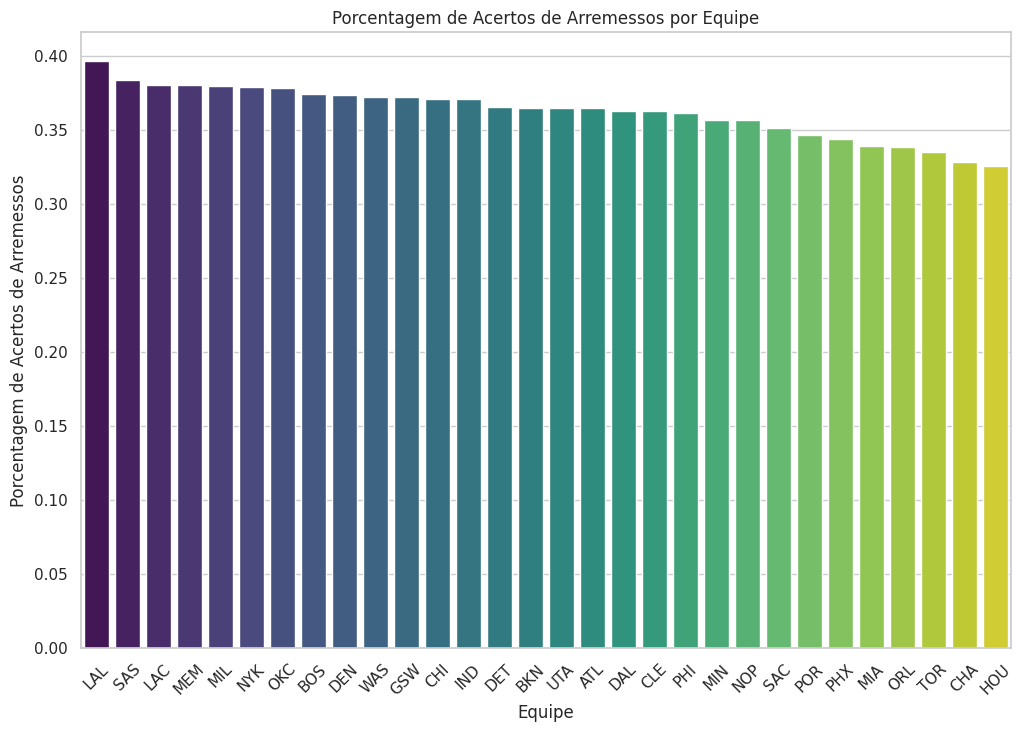

In [ ]:
team_fg_pct = df.groupby('TEAM_ABBREVIATION')['FG_PCT'].mean().reset_index()

# Ordenar as equipes pela porcentagem média de acertos de arremessos
team_fg_pct = team_fg_pct.sort_values(by='FG_PCT', ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='TEAM_ABBREVIATION', y='FG_PCT', data=team_fg_pct, palette='viridis')
plt.title('Porcentagem de Acertos de Arremessos por Equipe')
plt.xlabel('Equipe')
plt.ylabel('Porcentagem de Acertos de Arremessos')
plt.xticks(rotation=45)
plt.show()

<ipython-input-42-edfc6f5218f4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TEAM_CITY', y='PTS', data=df_filtered, palette='Set2')


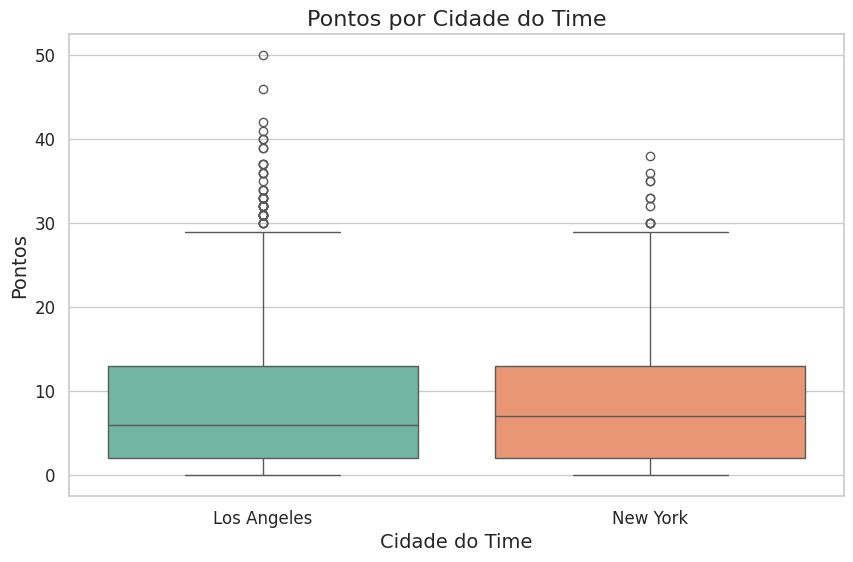

In [42]:
df_filtered = df[df['TEAM_CITY'].isin(['Los Angeles', 'New York'])]

plt.figure(figsize=(10, 6))
sns.boxplot(x='TEAM_CITY', y='PTS', data=df_filtered, palette='Set2')

plt.title('Pontos por Cidade do Time', fontsize=16)
plt.xlabel('Cidade do Time', fontsize=14)
plt.ylabel('Pontos', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

## Comparando pontos entre diferentes cidades de times

Agora, vamos comparar os pontos entre times de Los Angeles e New York.

In [44]:
from scipy.stats import ttest_ind


pontos_los_angeles = df[df['TEAM_CITY'] == 'Los Angeles']['PTS'].dropna()
pontos_new_york = df[df['TEAM_CITY'] == 'New York']['PTS'].dropna()


t_stat, p_val = ttest_ind(pontos_los_angeles, pontos_new_york)

print(f'Estatística t: {t_stat}')
print(f'Valor p: {p_val}')

Estatística t: 1.4658487522373875
Valor p: 0.14287143145390963


Com os resultados obtidos, não conseguimos concluir se há uma diferença significativa de pontos marcados entre as duas cidades.

## Analisando as faltas

Plotamos gráficos para entender se havia uma grande quantidade de faltas nos jogadores. Conversando com alguns amigos que entendiam melhor sobre basquete, descobrimos que normalmente, há um número alto de faltas em partidas. Nos gráficos plotados, não mostraram essa afirmação, mas entendemos que há vários tipos de faltas que são aplicadas.

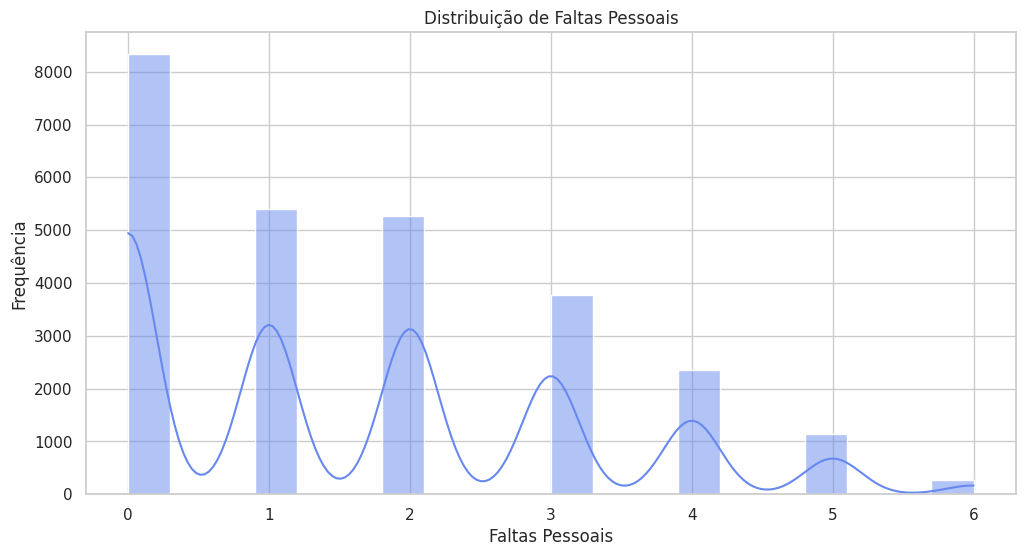

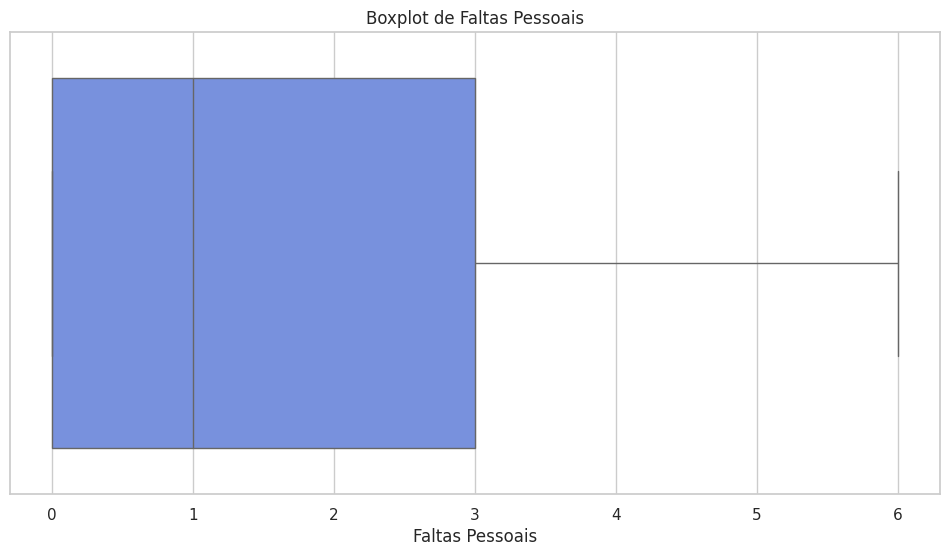

In [45]:
plt.figure(figsize=(12, 6))
sns.histplot(df['PF'], bins=20, kde=True)
plt.title('Distribuição de Faltas Pessoais')
plt.xlabel('Faltas Pessoais')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='PF', data=df)
plt.title('Boxplot de Faltas Pessoais')
plt.xlabel('Faltas Pessoais')
plt.show()

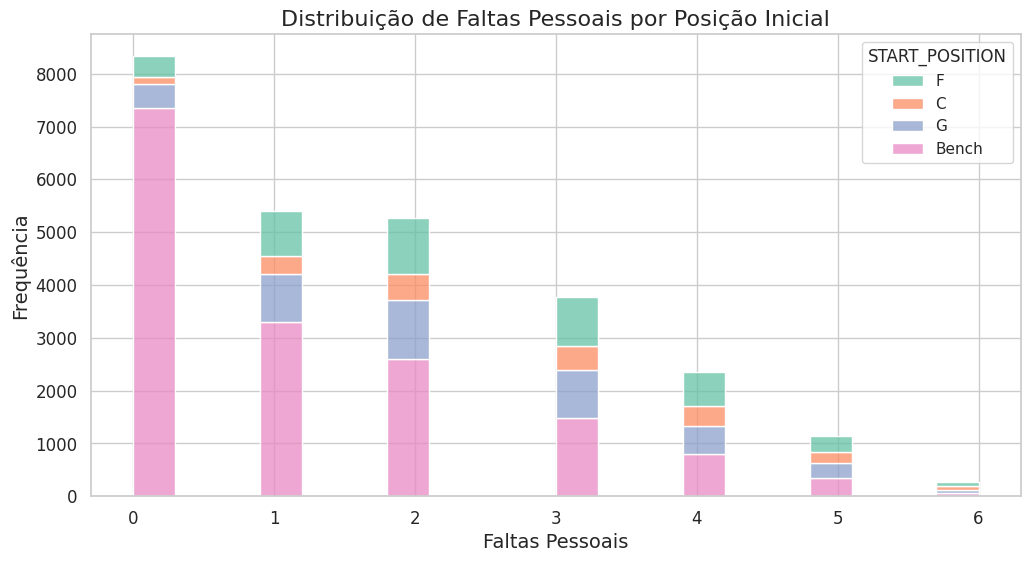

In [48]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='PF', hue='START_POSITION', multiple='stack', palette='Set2', bins=20)
plt.title('Distribuição de Faltas Pessoais por Posição Inicial', fontsize=16)
plt.xlabel('Faltas Pessoais', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Analisando a eficiência dos jogadores de acordo com as suas posições

Verificamos a eficiência dos jogadores de acordo com as posições inciais, e obtivemos os seguintes resultados:



*  **Start Position Bench:** Jogadores que começam como reservas têm uma eficiência de arremessos de campo e de três pontos um pouco menor, mas uma eficiência de lances livres relativamente boa.
*   **C:** Possuem uma boa eficiência de arremessos de campo, mas uma eficiência de arremessos de três pontos um pouco menor em comparação com outras posições.
* **F:** Eficiência de arremessos de três pontos um pouco melhor em comparação com outras posições.
* **G:** Têm uma eficiência de lances livres relativamente alta e uma eficiência de arremessos de campo e de três pontos semelhantes às outras posições.




In [51]:
posicoes_preenchidas = df[df['START_POSITION'].notna()]

eficiencia_por_posicao = posicoes_preenchidas.groupby('START_POSITION')[['FG_EFF', 'FG3_EFF', 'FT_EFF']].mean()

print(eficiencia_por_posicao)

                   FG_EFF    FG3_EFF     FT_EFF
START_POSITION                                 
Bench           43.448548  31.558454  73.862867
C               54.291790  31.027685  69.251620
F               45.420702  34.060429  78.283933
G               43.104608  34.104900  80.032841
